# Exercise 1.1

Calculate the Taylor series at the expansion point $x= 0$ of the functions $\frac{1}{x−1}$ and $\frac{1}{x2+1}$, and plot the Taylor polynomials for n∈{10,20,40} on the interval [−2,2]. Hint: A partial fraction decomposition of the second function explains the bad be-haviour of the harmless looking function.

Taylor polynomial:
$$P_T = \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n$$

For $$\frac{1}{x−1}:$$


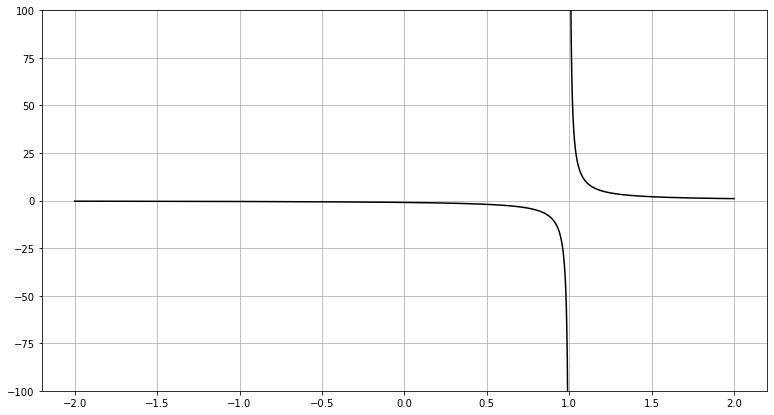

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
import numpy.ma as ma

import warnings
warnings.filterwarnings('ignore')

x_bounds = (-2, 2)
x1_vector = np.linspace(x_bounds[0], 1, 1000)
x2_vector = np.linspace(1, x_bounds[1], 1000)
y1_vector = 1 / (x1_vector-1)
y2_vector = 1 / (x2_vector-1)

plt.figure(figsize = (13, 7))
plt.plot(x1_vector, y1_vector, 'k')
plt.plot(x2_vector, y2_vector, 'k')
plt.ylim([-100, 100])
plt.grid()

$$ f(x) = \frac{1}{x-1} $$

$$ f'(x) = -\frac{1}{(x-1)^2} $$

$$ f''(x) = -\frac{2(x-1)}{(x-1)^4} = \frac{2}{(x-1)^3} $$

$$ f'''(x) = -\frac{6}{(x-1)^4} $$

Idea:

$$ f^{(n)} = (-1)^n \frac{n!}{(x-1)^{n+1}} $$

Prove by induction:

$$ f^{(n+1)} = (-1)^n \frac{-n!(n+1)(x-1)^n}{(x-1)^{2n+2}} = (-1)^{n+1} \frac{(n+1)!}{(x-1)^{n+2}}$$

Taylor polynomial:
$$T(x) = \sum_{n=0}^\infty (-1)^n \frac{n! (x-x_0)^n}{n! (x_0-1)^{n+1}}$$

$$ x_0 = 0 $$

$$ T(x) = \sum_{n=0}^\infty (-1)^n \frac{(x)^n}{(-1)^{n+1}} $$

$$ T(x) = - \sum_{n=0}^\infty x^n $$

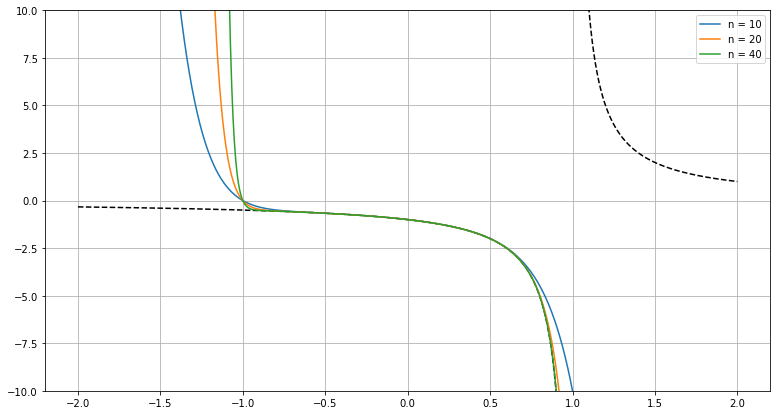

In [2]:
n_list = (10, 20, 40)
x_plot = np.linspace(x_bounds[0], x_bounds[1], 1000).reshape((-1, 1))

plt.figure(figsize = (13, 7))
plt.plot(x1_vector, y1_vector, '--k')
plt.plot(x2_vector, y2_vector, '--k')

for n in n_list:
    tp = - np.sum(x_plot ** np.arange(n), axis=1)
    
    plt.plot(x_plot, tp, label="n = " + str(n))
    
plt.ylim([-10, 10])
plt.grid()
plt.legend()

For
$$ f(x) = \frac{1}{x^2+1} $$


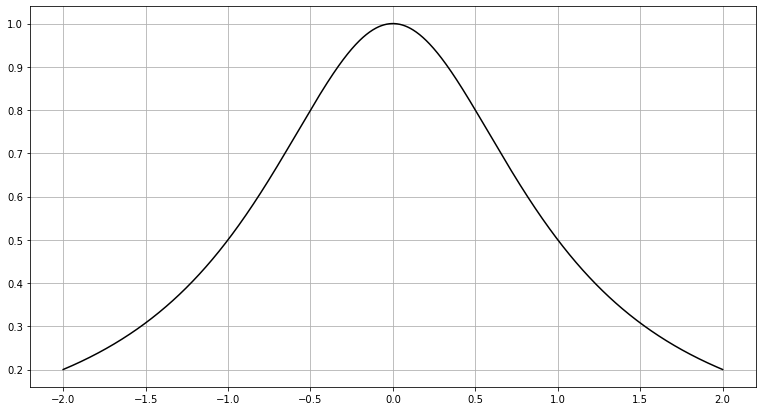

In [3]:
y_vector = 1 / (x_plot**2 +1)

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_vector, 'k')
plt.grid()

$$ f(x) = \frac{1}{x^2+1} $$

$$ f'(x) = \frac{-2x}{(x^2+1)^2}$$

$$ f''(x) = \frac{8x-2(x^2+1)}{(x^2+1)^3} $$

$$ f'''(x) = -\frac{24}{(x^2+1)^3} $$

$$ ... $$

With partial fraction decomposition:

$$ f(x) = \frac{1}{x^2+1} = \frac{i}{2(x+i)} - \frac{i}{2(x-i)} $$

$$ f'(x) = -\frac{i}{2(x+i)^2} + \frac{i}{2(x-i)^2} $$

$$ f''(x) = \frac{i}{(x+i)^3} - \frac{i}{(x-i)^3} $$

$$ f'''(x) = \frac{3i}{(x+i)^4} + \frac{3i}{(x-i)^4} $$

$$ f^{4}(x) = \frac{3*4i}{(x+i)^5} + \frac{3*4i}{(x-i)^5} $$

--> Idea:

$$ f^{(n)}(x) = (-1)^{n+1} (\frac{n!i}{2(x+i)^{n+1}} - \frac{n!i}{2(x-i)^{n+1}}) $$

Prove by induction:

$$ f^{(n+1)}(x) = (-1)^{n+1} (-\frac{2n!(n+1)(x+i)^{n}i}{4(x+i)^{2n+2}} + \frac{2n!(n+1)(x-i)^{n}i}{4(x-i)^{2n+2}}) $$
$$ ... = (-1)^{n+2} (\frac{(n+1)!i}{2(x+i)^{n+2}} - \frac{(n+1)!i}{2(x-i)^{n+2}})$$

Derivatives at $x=0$:
$$ f^{(n)}(0) = (-1)^{n+1} (\frac{n!i}{2i^{n+1}} + \frac{n!i}{2i^{n+1}}) = (-1)^{n+1} \frac{n!i}{i^{n+1}}$$

Taylor polynomial:
$$P_T = \sum_{n=0}^\infty \frac{f^{(n)}(x_0)}{n!} (x-x_0)^n$$

$$P_T = \sum_{n=0}^\infty (-1)^{n+1} \frac{i}{i^{n+1}} x^n$$

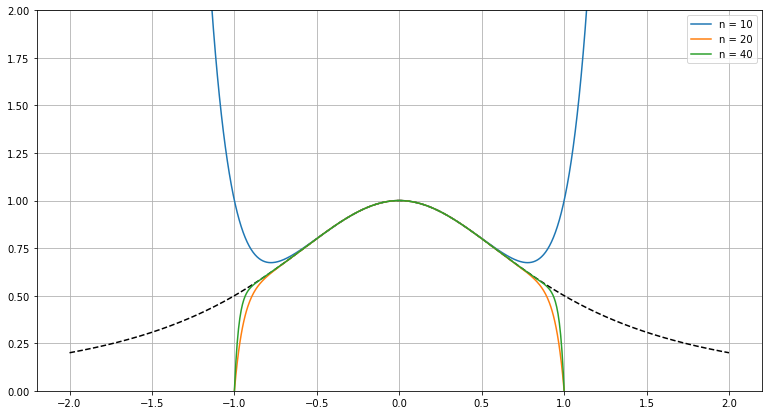

In [4]:
n_list = (10, 20, 40)
x_plot = np.linspace(x_bounds[0], x_bounds[1], 1000).reshape((-1, 1))

plt.figure(figsize = (13, 7))
plt.plot(x_plot, y_vector, '--k')

for n in n_list:
    tp = np.sum(np.resize([1,-1], n//2) * x_plot**(2*np.arange(n//2)), axis=1)
    
    plt.plot(x_plot, tp, label="n = " + str(n))
    
plt.ylim([0, 2])
plt.grid()
plt.legend()

# Exercise 1.2

Compute and plot interpolation polynomials to $$ \frac{1}{x^2+1}$$ on the interval [−5,5], for n ∈ {10,20,40}. Choose uniformly distributed points, and Chebyshev points on [−5,5]: 
$x_i= 5 cos\frac{(i+0.5)\pi}{n+1}$ for $i= 0,...,n$.

Plot the Lagrange interpolation polynomials $l_i$ for both choices of points.
Investigate numerically 
$$ max_{i∈\{0,...,n\}}  max_{x∈[−5,5]}|li(x)|$$ and $$max_{x∈[−5,5]} \sum_{i=0}^n |li(x)|$$ depending on n.

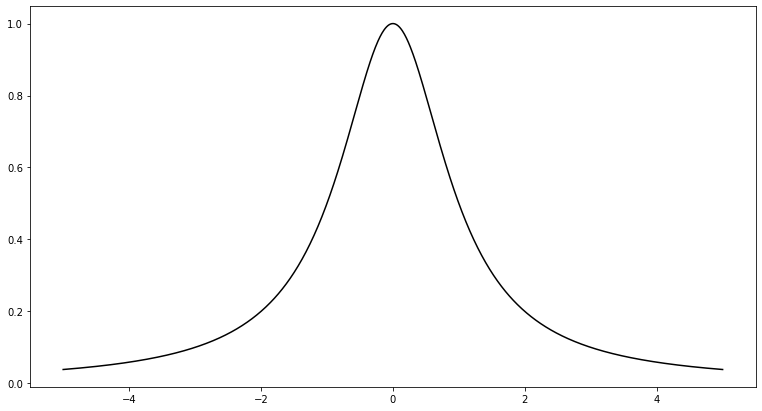

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x_interval = (-5, 5)
x_vector = np.linspace(x_interval[0], x_interval[1], 1000)

y_fun = 1/(x_vector**2+1)
plt.figure(figsize = (13, 7))
plt.grid()
plt.plot(x_vector, y_fun, 'k')
plt.grid()

In [6]:
def Lagrange (pts, i, x):
    prod = 1
    for j in range(len(pts)):
        if j != i:
            prod = prod * (x-pts[j])/(pts[i]-pts[j])
    return prod    

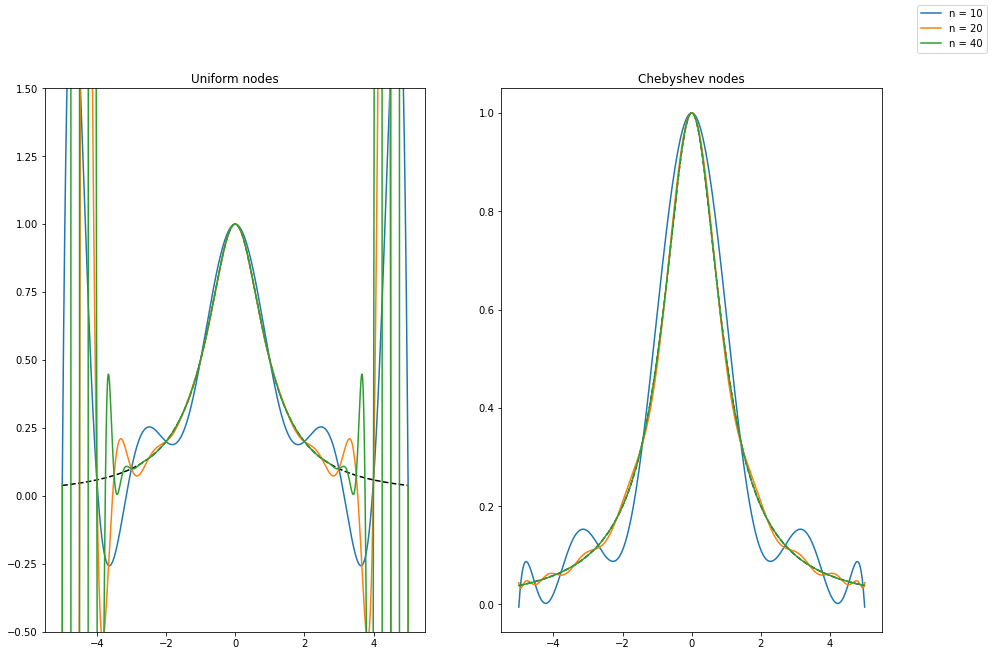

In [7]:
n_list = (10, 20, 40)

fig, axes = plt.subplots(1,2, figsize = (15, 10))
axes[0].plot(x_vector, y_fun, '--k')
axes[1].plot(x_vector, y_fun, '--k')

li_uniform_list = []
li_chebyshev_list = []

for n_idx, n in enumerate(n_list):   
    i = np.arange(n+1)
    
    current_li_uniform_matrix = np.empty((len(x_vector), n+1))
    current_li_chebyshev_matrix = np.empty((len(x_vector), n+1))
    
    uniform_nodes = np.linspace(x_interval[0], x_interval[1], n+1)
    chebyshev_nodes = 5*np.cos(np.pi * (i+0.5)/(n+1))
    
    fi_uniform = 1/(uniform_nodes**2+1)
    fi_chebyshev = 1/(chebyshev_nodes**2+1)
        
    for current_i in i:
        li_uniform = Lagrange(uniform_nodes, current_i, x_vector)
        li_chebyshev = Lagrange(chebyshev_nodes, current_i, x_vector)
        
        current_li_uniform_matrix[:, current_i] = li_uniform
        current_li_chebyshev_matrix[:, current_i] = li_chebyshev
        
    
    P_uniform = np.sum(current_li_uniform_matrix * fi_uniform.reshape((-1, n+1)), axis=1)
    P_chebyshev = np.sum(current_li_chebyshev_matrix * fi_chebyshev.reshape((-1, n+1)), axis=1)
    axes[0].plot(x_vector, P_uniform, label="n = "+str(n))
    axes[1].plot(x_vector, P_chebyshev)
           
        
    li_uniform_list.append(current_li_uniform_matrix)
    li_chebyshev_list.append(current_li_chebyshev_matrix)
        
axes[0].set_ylim([-0.5, 1.5])
fig.legend()
axes[0].grid()
axes[1].grid()
axes[0].set_title("Uniform nodes")
axes[1].set_title("Chebyshev nodes")
axes[0].grid()
axes[1].grid()

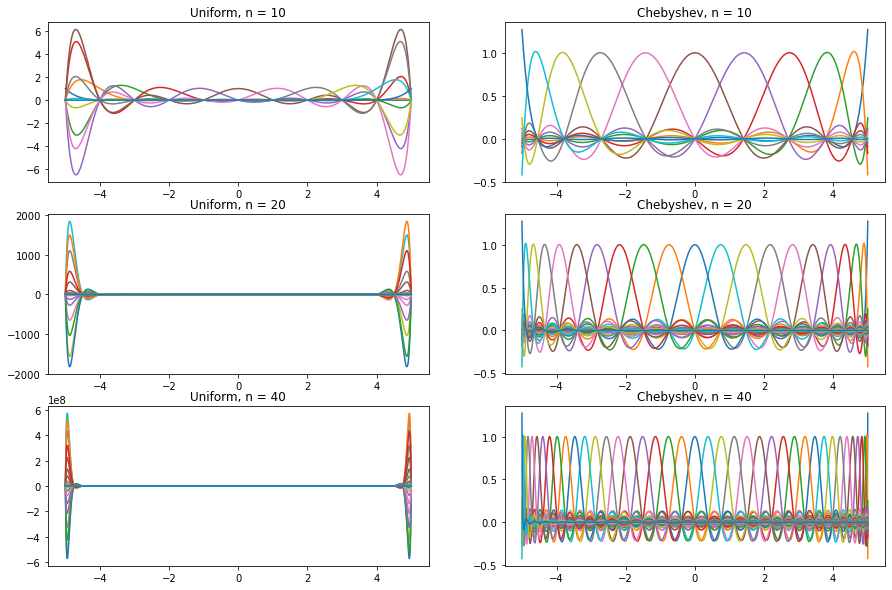

In [8]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10))

for n_idx, n in enumerate(n_list):   
    axes[n_idx][0].plot(x_vector, li_uniform_list[n_idx])
    axes[n_idx][1].plot(x_vector, li_chebyshev_list[n_idx])
    
    axes[n_idx][0].set_title("Uniform, n = " + str(n))
    axes[n_idx][1].set_title("Chebyshev, n = " + str(n))

Text(0.5, 1.0, 'max sum Chebyshev')

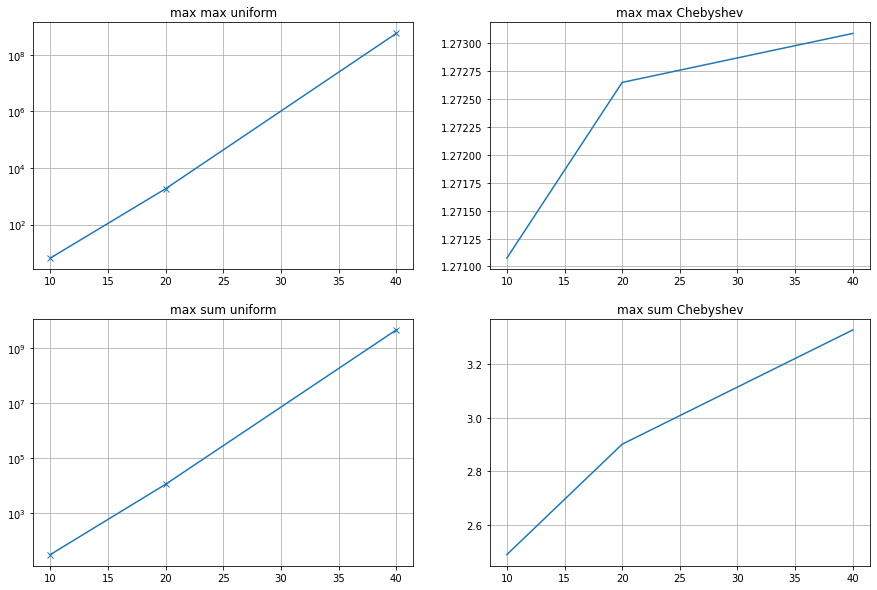

In [9]:
max_max_li_uni = []
max_max_li_che = []
max_sum_li_uni = []
max_sum_li_che = []

for n_idx, n in enumerate(n_list):
    
    np.amax(np.abs(li_chebyshev_list[n_idx]))
    
    max_max_li_uni.append(np.amax(np.abs(li_uniform_list[n_idx])))
    max_max_li_che.append(np.amax(np.abs(li_chebyshev_list[n_idx])))
                          
    max_sum_li_uni.append(np.amax(np.sum(np.abs(li_uniform_list[n_idx]), axis=1)))
    max_sum_li_che.append(np.amax(np.sum(np.abs(li_chebyshev_list[n_idx]), axis=1)))
    
plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(2, 2, figsize = (15, 10))


axes[0][0].plot(n_list, max_max_li_uni, '-x')
axes[0][0].set_title("max max uniform")
axes[0][0].set_yscale("log")
axes[0][1].plot(n_list, max_max_li_che)
axes[0][1].set_title("max max Chebyshev")

axes[1][0].plot(n_list, max_sum_li_uni, '-x')
axes[1][0].set_title("max sum uniform")
axes[1][0].set_yscale("log")
axes[1][1].plot(n_list, max_sum_li_che)
axes[1][1].set_title("max sum Chebyshev")



# Exercise 1.4

Implement the Aitken-Nevill scheme for polynomial interpolation. Test it for numerical differentiation by extrapolation for $f(x) = sin(x)$

$$ D_f(x, h) :=\frac{f(x+h)−f(x)}{h}$$
and
$$ D_{f,sym} := \frac{f(x+h)−f(x−h)}{2h} $$

Choose $x=\pi$,  and interpolation points $h_i=q^i$ for $i ∈ \{0,...n\}$. Generate convergence plot for the errors $f′(x)−D_f(x,0)$. Try  different refinement ratios $q∈(0,1)$. How does this effect speed of convergence, and reachable accuracy? Since $\underset{h→0}{lim} D_{f,sym}(x,h) = \underset{h→0}{lim}D_{f,sym}(x,\sqrt{h})$, try also extrapolation of the function $h→D_{f,sym}(x,\sqrt{h})$.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def aitken_neville(x_nodes, y_nodes, x):
    p = y_nodes
    n = len(x_nodes)-1
    
    for m in range(n):
        for i in range(n-m):
            j = i+1+m
            p[i] = ((x-x_nodes[j]) * p[i] - (x-x_nodes[i]) * p[i+1]) / (x_nodes[i] - x_nodes[j])
    
    return p[0]

Testing of the implementation in a numerical differentiation by extrapolation.
$$f(x) = sin(x)$$
$$f'(x) = cos(x)$$
$$f'(\pi) = -1 $$

In [11]:
n_list = np.arange(3, 8)
q_list = np.linspace(0.01, 0.9, 40)

error_matrix_single = np.empty((len(n_list), len(q_list)))
error_matrix_sym = np.empty((len(n_list), len(q_list)))
error_matrix_sym_sqrt = np.empty((len(n_list), len(q_list)))

for n_idx, n in enumerate(n_list):
    for q_idx, q in enumerate(q_list):
        h_i = q ** np.arange(n+1)

        f_hi = np.sin(np.pi + h_i)
        f_neg_hi = np.sin(np.pi - h_i)
        f_sqrt_hi = np.sin(np.pi + np.sqrt(h_i))
        f_neg_sqrt_hi = np.sin(np.pi - np.sqrt(h_i))

        f_x0 = 0

        D_f = (f_hi - f_x0)/h_i
        D_f_sym = (f_hi - f_neg_hi)/(2*h_i)
        D_f_sym_sqrt = (f_sqrt_hi - f_neg_sqrt_hi)/(2*np.sqrt(h_i))

        single_estimate = aitken_neville(h_i, D_f, 0)
        sym_estimate = aitken_neville(h_i, D_f_sym, 0)
        sym_sqrt_estimate = aitken_neville(h_i, D_f_sym_sqrt, 0)
    
        error_matrix_single[n_idx, q_idx] = abs(-1 - single_estimate)
        error_matrix_sym[n_idx, q_idx] = abs(-1 - sym_estimate)
        error_matrix_sym_sqrt[n_idx, q_idx] = abs(-1 - sym_sqrt_estimate)

Text(0.5, 0, 'refinement ratios q')

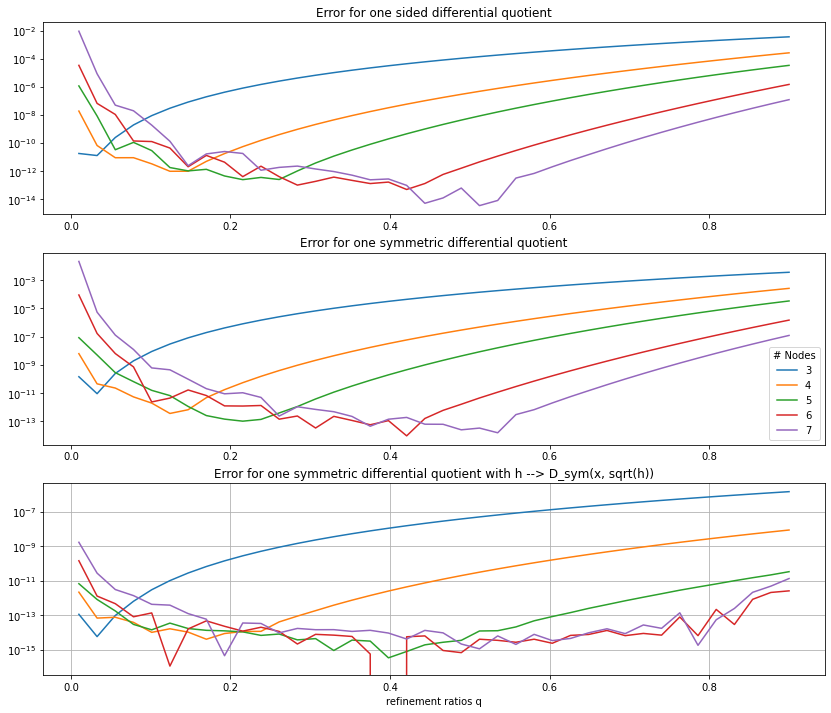

In [17]:
fig, axes = plt.subplots(3, 1, figsize = (14, 12))
axes[0].plot(q_list, error_matrix_single.T)
axes[0].set_yscale('log')

axes[1].plot(q_list, error_matrix_sym.T)
#axes[1].plot(q_list, error_matrix_sym_sqrt.T, 'k')
axes[1].set_yscale('log')

axes[1].legend([str(x) for x in n_list], title="# Nodes")

#axes[2].plot(q_list, error_matrix_sym.T, 'k', alpha=0.5)
axes[2].plot(q_list, error_matrix_sym_sqrt.T)
axes[2].set_yscale('log')
axes[2].grid()

axes[0].grid()
axes[1].grid()
axes[2].grid()
axes[0].set_title("Error for one sided differential quotient")
axes[1].set_title("Error for one symmetric differential quotient")
axes[2].set_title("Error for one symmetric differential quotient with h --> D_sym(x, sqrt(h))")
axes[2].set_xlabel("refinement ratios q")



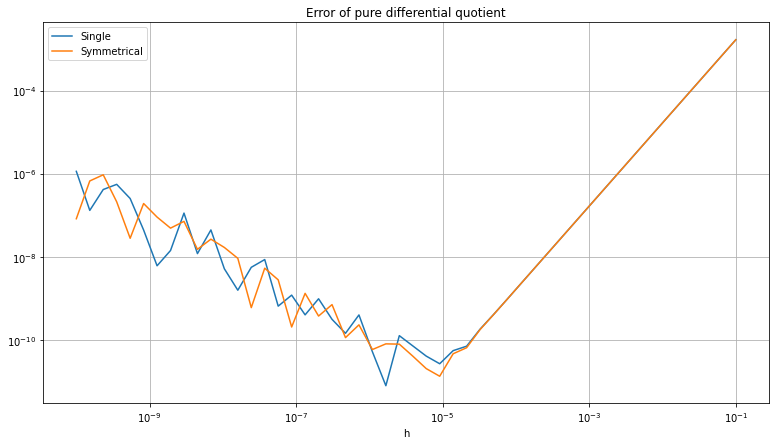

In [16]:
h_i_list = np.logspace(-1, -10)

error_vektor_single = np.empty(len(h_i_list))
error_vektor_sym = np.empty(len(h_i_list))

for idx, h_i in enumerate(h_i_list):
    D_f = (np.sin(np.pi + h_i))/h_i
    D_f_sym = (np.sin(np.pi + h_i) - np.sin(np.pi - h_i))/(2*h_i)
    
    error_vektor_single[idx] = abs(-1 - D_f)
    error_vektor_sym[idx] = abs(-1 - D_f_sym)

plt.figure(figsize = (13, 7))
plt.loglog(h_i_list, error_vektor_single, label="Single")
plt.loglog(h_i_list, error_vektor_sym, label="Symmetrical")
plt.grid()
plt.title("Error of pure differential quotient")
plt.xlabel("h")
plt.legend()
plt.grid()